# **UNIVERSIDAD POLITÉCNICA SALESIANA**

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/Logo_Universidad_Polit%C3%A9cnica_Salesiana_del_Ecuador.png" alt="logo universidad" width="550" height="150">

### **CIENCIAS DE LA COMPUTACIÓN**
### **INTELIGENCIA ARTIFICIAL**

---
### **PRÁCTICA INTERCICLO**
### **Preparacion y Transformaciones de Variables**
---

**Integrantes:** Paúl Sebastián Naspud, Jennyfer Camila Ramírez

**Fecha de Entrega:** 03 de diciembre de 2025

---



## Índice
- [1. Carga del Data Set](#sec1)
- [2. Tabla de Transformaciones del Dataset](#sec2)
- [3. Preparación del Data Set y Variables](#sec3)
  - [3.1 Eliminación Variables No Relevantes](#sec31)
  - [3.2 Manejo de Datos Faltantes](#sec32)
- [4. Transformaciones](#sec4)
  - [4.1 Análisis de Variables Categóricas](#sec41)
  - [4.2 Diseño de Transformadores](#sec42)
  - [4.3 Diseño de Pipeline](#sec43)
  - [4.4 Etapa de transformación de variables](#sec44)
- [5. Dataset Transformado](#sec5)
  - [5.1 Descargar .CSV y Pipeline](#sec51)
- [6. Análisis de Correlación](#sec6)
  - [6.1 Gráfica de correlación](#sec61)
  - [6.2 Resultados](#sec62)
- [7. Conclusiones](#sec7)



## <span id="sec1"></span> **1. Carga del Data Set**

Se utilizó el dataset “Autism Screening Adult”, obtenido del UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/426/autism+screening+adult. El archivo fue descargado en formato .arff y posteriormente cargado en un DataFrame para su análisis y actualizados sus nombre de columnas para mayor compresión.


In [ ]:
# Bibliotecas a usar
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import numpy as np
import seaborn as sns

from scipy.io import arff
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [17]:
# Nuevos nombres descriptivos para cada variable
nombresVariables = [
    'DETALLES_FINOS','ENFOQUE_GLOBAL','SEGUIR_CHARLAS','CAMBIO_TAREAS',
    'ENTENDER_INTENCIONES','NOTAR_INTERES','IMAGINACION_SOCIAL',
    'INTERESES_INTENSOS','LEER_FACIALES','SOCIAL_AMISTAD',
    'EDAD','GENERO','ETNIA','ICTERICIA','AUTISMO','RESIDENCIA',
    'USO_PREVIO','RESULTADO','EDAD_RANGO','RELACION','OBJETIVO_ASD'
]

ruta_archivo = "Autism-Adult-Data.arff"

data, meta = arff.loadarff(ruta_archivo)
df_original = pd.DataFrame(data)

df_original = df_original.map(lambda x: x.decode() if isinstance(x, bytes) else x)

df_original.columns = nombresVariables
df = df_original.copy()

print("[Correcto]: Datos cargados y encabezados actualizados correctamente")


[Correcto]: Datos cargados y encabezados actualizados correctamente


In [18]:
for col in df.columns:
    print(f"\n========== {col} ==========")
    print(f"Cantidad de valores únicos: {df[col].nunique()}")
    print(f"Valores únicos: {df[col].unique()}")



========== DETALLES_FINOS ==========
Cantidad de valores únicos: 2
Valores únicos: ['1' '0']

========== ENFOQUE_GLOBAL ==========
Cantidad de valores únicos: 2
Valores únicos: ['1' '0']

========== SEGUIR_CHARLAS ==========
Cantidad de valores únicos: 2
Valores únicos: ['1' '0']

========== CAMBIO_TAREAS ==========
Cantidad de valores únicos: 2
Valores únicos: ['1' '0']

========== ENTENDER_INTENCIONES ==========
Cantidad de valores únicos: 2
Valores únicos: ['0' '1']

========== NOTAR_INTERES ==========
Cantidad de valores únicos: 2
Valores únicos: ['0' '1']

========== IMAGINACION_SOCIAL ==========
Cantidad de valores únicos: 2
Valores únicos: ['1' '0']

========== INTERESES_INTENSOS ==========
Cantidad de valores únicos: 2
Valores únicos: ['1' '0']

========== LEER_FACIALES ==========
Cantidad de valores únicos: 2
Valores únicos: ['0' '1']

========== SOCIAL_AMISTAD ==========
Cantidad de valores únicos: 2
Valores únicos: ['0' '1']

========== EDAD ==========
Cantidad de valores ú

In [19]:
df.head()

,DETALLES_FINOS,ENFOQUE_GLOBAL,SEGUIR_CHARLAS,CAMBIO_TAREAS,ENTENDER_INTENCIONES,NOTAR_INTERES,IMAGINACION_SOCIAL,INTERESES_INTENSOS,LEER_FACIALES,SOCIAL_AMISTAD,...,GENERO,ETNIA,ICTERICIA,AUTISMO,RESIDENCIA,USO_PREVIO,RESULTADO,EDAD_RANGO,RELACION,OBJETIVO_ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


## <span id="sec2"></span> **2. Tabla de Transformaciones del Dataset**


La siguiente tabla resume el estado de cada variable del dataset luego del análisis exploratorio.  
Incluye el nombre original, el nuevo nombre asignado.  
Dado que el dataset viene mayormente limpio, muchas variables binarias ya están listas para usar.

| Id | Variable original | Nuevo nombre        | Descripción breve                                         | Tipo                     | Técnica de transformación aplicada                    |
|----|-------------------|---------------------|-------------------------------------------------------------|---------------------------|--------------------------------------------------------|
| 1  | A1_Score          | DETALLES_FINOS      | ¿Percibe detalles que otros no notan?                      | Categórica binaria       | Encoding + Estandarización                             |
| 2  | A2_Score          | ENFOQUE_GLOBAL      | ¿Se enfoca más en el panorama general que en detalles?     | Categórica binaria       | Encoding + Estandarización                             |
| 3  | A3_Score          | SEGUIR_CHARLAS      | ¿Puede seguir varias conversaciones a la vez?              | Categórica binaria       | Encoding + Estandarización                             |
| 4  | A4_Score          | CAMBIO_TAREAS       | ¿Cambia fácilmente de una tarea a otra?                    | Categórica binaria       | Encoding + Estandarización                             |
| 5  | A5_Score          | ENTENDER_INTENCIONES| ¿Entiende significados implícitos al conversar?            | Categórica binaria       | Encoding + Estandarización                             |
| 6  | A6_Score          | NOTAR_INTERES       | ¿Nota cuando alguien pierde interés al hablar?             | Categórica binaria       | Encoding + Estandarización                             |
| 7  | A7_Score          | IMAGINACION_SOCIAL  | ¿Disfruta actividades que requieren imaginación?           | Categórica binaria       | Encoding + Estandarización                             |
| 8  | A8_Score          | INTERESES_INTENSOS  | ¿Se interesa intensamente por temas muy específicos?        | Categórica binaria       | Encoding + Estandarización                             |
| 9  | A9_Score          | LEER_FACIALES       | ¿Interpreta emociones mediante expresiones faciales?       | Categórica binaria       | Encoding + Estandarización                             |
| 10 | A10_Score         | SOCIAL_AMISTAD      | ¿Le es fácil hacer amigos y entender intenciones?          | Categórica binaria       | Encoding + Estandarización                             |
| 11 | age               | EDAD                | Edad del participante                                       | Numérica discreta        | Estandarización                                        |
| 12 | gender            | GENERO              | Género declarado                                            | Categórica nominal       | Encoding Binario + Estandarización                             |
| 13 | ethnicity         | ETNIA               | Grupo étnico del participante                               | Categórica nominal       | Encoding Binario + Estandarización                             |
| 14 | jundice           | ICTERICIA           | Antecedentes de ictericia                                   | Categórica binaria       | Encoding + Estandarización                             |
| 15 | austim            | AUTISMO             | Antecedentes familiares de autismo                          | Categórica binaria       | Encoding + Estandarización                             |
| 16 | contry_of_res     | RESIDENCIA          | País de residencia                                           | Categórica nominal       | Encoding Binario + Estandarización                             |
| 17 | used_app_before   | USO_PREVIO          | Uso previo de la aplicación                                  | Categórica binaria       | Encoding + Estandarización                             |
| 18 | result            | RESULTADO           | Puntaje total del test                                       | Numérica continua        | Estandarización                                        |
| 19 | age_desc          | EDAD_RANGO          | Categoría o rango de edad                                   | Categórica nominal       | Encoding Binario + Estandarización                             |
| 20 | relation          | RELACION            | Relación del evaluador con el participante                  | Categórica nominal       | Encoding + Estandarización                             |
| 21 | Class/ASD         | OBJETIVO_ASD        | Indicador final del espectro autista                        | Categórica binaria       | Encoding                           |



## <span id="sec3"></span> **3. Preparación del Data Set y Variables**



### <span id="sec31"></span> **3.1 Eliminación Variables No Relevantes**

Durante el análisis preliminar del dataset se identificaron algunas variables que no aportan información significativa para el modelo de clasificación. Estas variables pueden generar ruido, aumentar la dimensionalidad innecesariamente o duplicar información ya presente en otras características.

A continuación, se detallan las variables eliminadas y la justificación correspondiente:

| Variable        | Motivo de eliminación                                                                 |
|-----------------|----------------------------------------------------------------------------------------|
| **age_desc**    | Es una versión categorizada de la edad. Duplica información ya contenida en la variable numérica `age`. |
| **relation**    | Presenta categorías dispersas, inconsistentes y poco relacionadas al diagnóstico de ASD en adultos. |
| **contry_of_res** | Variable altamente dispersa (muchos países), no guarda relación directa con los rasgos evaluados en el test y genera numerosas columnas tras la codificación. |

Estas variables fueron descartadas antes del proceso de transformación para evitar agregar ruido, reducir complejidad y mejorar la eficiencia del modelo.


In [20]:
# Columnas a eliminar según la selección de características
columnas_a_eliminar = [ 'RELACION', 'EDAD_RANGO', 'RESIDENCIA']
df.drop(columns=columnas_a_eliminar, inplace=True)

# Verificar dimensiones antes y después
print("Columnas :", df.columns.tolist())
print("Nuevo shape:", df.shape)


Columnas : ['DETALLES_FINOS', 'ENFOQUE_GLOBAL', 'SEGUIR_CHARLAS', 'CAMBIO_TAREAS', 'ENTENDER_INTENCIONES', 'NOTAR_INTERES', 'IMAGINACION_SOCIAL', 'INTERESES_INTENSOS', 'LEER_FACIALES', 'SOCIAL_AMISTAD', 'EDAD', 'GENERO', 'ETNIA', 'ICTERICIA', 'AUTISMO', 'USO_PREVIO', 'RESULTADO', 'OBJETIVO_ASD']
Nuevo shape: (704, 18)


### <span id="sec32"></span> **3.2 Manejo de Datos Faltantes**

Al analizar la completitud del dataset se obtuvo que `age`, poseé datos 2 datos faltantes entonces, se conservar la variables e imputar los valores faltantes de `age` utilizando la media de la edad.



In [21]:
print("Faltantes en age antes:", df['EDAD'].isna().sum())

# Calcular la media y remplazo
media_edad = df['EDAD'].mean()
df['EDAD'] = df['EDAD'].fillna(media_edad)

print("Faltantes en age después:", df['EDAD'].isna().sum())


Faltantes en age antes: 2
Faltantes en age después: 0


## <span id="sec4"></span> **4. Transformaciones**


In [22]:

categorical_nominal_features = ['GENERO', 'ETNIA' ]
numeric_features = ['EDAD', 'RESULTADO']
categorical_ordinal_features = []

binary_features = [
    'DETALLES_FINOS','ENFOQUE_GLOBAL','SEGUIR_CHARLAS','CAMBIO_TAREAS',
    'ENTENDER_INTENCIONES','NOTAR_INTERES','IMAGINACION_SOCIAL',
    'INTERESES_INTENSOS','LEER_FACIALES','SOCIAL_AMISTAD',
    'ICTERICIA','AUTISMO','USO_PREVIO'
]

target_col = 'OBJETIVO_ASD'

In [23]:
df[binary_features] = df[binary_features].replace({
    'no': 0, 'yes': 1,
    'NO': 0, 'YES': 1
}).infer_objects(copy=False)

df[target_col] = df[target_col].replace({
    'no': 0, 'yes': 1,
    'NO': 0, 'YES': 1
}).infer_objects(copy=False)


/tmp/ipykernel_193020/1921572873.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_features] = df[binary_features].replace({
/tmp/ipykernel_193020/1921572873.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[target_col] = df[target_col].replace({


### <span id="sec41"></span> **4.1 Análisis de Variables Categóricas**


In [24]:
def analisisVariables(dataframe, categorical_nominal_features):
    cantidadTotalVariables = len(dataframe.columns)
    print("Cantidad de variables antes de transformación:", cantidadTotalVariables)

    cantidadVariablesNominales = len(categorical_nominal_features)
    cantidadVariablesBinarias = 0

    for variable in categorical_nominal_features:
        n_categorias = dataframe[variable].nunique()
        cantidadVariablesBinarias += n_categorias
        print(f"Categorías en {variable}: {n_categorias}")

    print("Cantidad de variables binarias que reemplazarán a las nominales:",
          cantidadVariablesBinarias)

    cantidadTotalVariablesConTransformacion = (
        cantidadTotalVariables - cantidadVariablesNominales + cantidadVariablesBinarias
    )

    return cantidadTotalVariablesConTransformacion

cantidadTotalVariablesConTransformacion = analisisVariables(df, categorical_nominal_features)

print("Cantidad de variables después de la transformación:",
      cantidadTotalVariablesConTransformacion)


Cantidad de variables antes de transformación: 18
Categorías en GENERO: 2
Categorías en ETNIA: 12
Cantidad de variables binarias que reemplazarán a las nominales: 14
Cantidad de variables después de la transformación: 30


### <span id="sec42"></span> **4.2 Diseño de Transformadores**

Por medio de un Pipeline creamos un estimador compuesto. Esta herramienta nos permite combinar preprocesadores y transformadores para llevar un orden y estructura en el proceso de transformación de variables. Para una mejor organización creamos los preprocesadores y sus métodos de transformación.

### <span id="sec43"></span> **4.3 Diseño de Pipeline**

El objetivo del Pipeline es organizar el flujo de transformaciones de datos antes del entrenamiento
del modelo.

El procesador `prepcn` (preprocesamiento categórico–numérico) es indispensable aplicarlo primero,
ya que convierte las variables categóricas (`GENERO`, `ETNIA`) en variables numéricas mediante
One-Hot Encoding.  
Sin esta transformación inicial, las siguientes etapas de normalización no podrían aplicarse.

Después de convertir las variables categóricas, el Pipeline aplica MinMaxScaler (`prepminmax`)
sobre todas las variables resultantes, dejando el dataset completamente numérico y escalado en el
rango [0, 1].



In [25]:
#    - OneHot para GENERO y ETNIA
#    - Passthrough para numéricas + binarias (ya codificadas)
preprocesorCategoricoNumericoConNombres = ColumnTransformer(
    transformers=[
        ('catnom',
         OneHotEncoder(sparse_output=False, handle_unknown="ignore"),
         categorical_nominal_features),
        ('num_bin',
         'passthrough',
         numeric_features + binary_features)
    ],
    remainder='drop',
    n_jobs=-1
)

pipe = Pipeline(steps=[
    ('prepcn', preprocesorCategoricoNumericoConNombres),
    ('scaler', StandardScaler(with_mean=True, with_std=True))
])

### <span id="sec44"></span> **4.4 Etapa de transformación de variables**


In [26]:
# Ejecutar el pipeline
dataframeTransformado = df.copy()
Y = dataframeTransformado[[target_col]]
X_only = dataframeTransformado.drop(columns=[target_col])

X_Transformado = pipe.fit_transform(X_only)
print("********** Pipeline aplicado")

cnamesDataset1 = []

if len(categorical_nominal_features) != 0:
    # catnom ES un OneHotEncoder, NO un Pipeline
    ohe = pipe.named_steps['prepcn'].named_transformers_['catnom']
    cnamesDataset2 = ohe.get_feature_names_out(categorical_nominal_features)
    cnamesDataset1.extend(cnamesDataset2)

# Agregar nombres de numéricas + binarias (passthrough)
cnamesDataset1.extend(numeric_features + binary_features)

print("********** Cantidad de variables:", len(cnamesDataset1))
print("********** Lista de variables:")
print(cnamesDataset1)

********** Pipeline aplicado
********** Cantidad de variables: 29
********** Lista de variables:
['GENERO_f', 'GENERO_m', 'ETNIA_?', 'ETNIA_Asian', 'ETNIA_Black', 'ETNIA_Hispanic', 'ETNIA_Latino', 'ETNIA_Middle Eastern ', 'ETNIA_Others', 'ETNIA_Pasifika', 'ETNIA_South Asian', 'ETNIA_Turkish', 'ETNIA_White-European', 'ETNIA_others', 'EDAD', 'RESULTADO', 'DETALLES_FINOS', 'ENFOQUE_GLOBAL', 'SEGUIR_CHARLAS', 'CAMBIO_TAREAS', 'ENTENDER_INTENCIONES', 'NOTAR_INTERES', 'IMAGINACION_SOCIAL', 'INTERESES_INTENSOS', 'LEER_FACIALES', 'SOCIAL_AMISTAD', 'ICTERICIA', 'AUTISMO', 'USO_PREVIO']


## <span id="sec5"></span> **5. Dataset Transformado**


In [27]:
dataframeTransformado = pd.DataFrame(X_Transformado, columns=cnamesDataset1)
dataframeTransformado.to_csv("dataset_transformado_sin_etiquetas.csv", sep=";", index=False)
dataframeTransformado = pd.concat([dataframeTransformado, Y.reset_index(drop=True)], axis=1)
dataframeTransformado.to_csv("dataset_transformado_con_etiquetas.csv", sep=";", index=False)
dataframeTransformado.head()


,GENERO_f,GENERO_m,ETNIA_?,ETNIA_Asian,ETNIA_Black,ETNIA_Hispanic,ETNIA_Latino,ETNIA_Middle Eastern,ETNIA_Others,ETNIA_Pasifika,...,ENTENDER_INTENCIONES,NOTAR_INTERES,IMAGINACION_SOCIAL,INTERESES_INTENSOS,LEER_FACIALES,SOCIAL_AMISTAD,ICTERICIA,AUTISMO,USO_PREVIO,OBJETIVO_ASD
0,1.043562,-1.043562,-0.394960,-0.460113,-0.255055,-0.137162,-0.170996,-0.38772,-0.210975,-0.131685,...,-0.997163,-0.629941,1.180914,0.735174,-0.692092,-1.160460,-0.329638,-0.385292,-0.131685,0
1,-0.958257,0.958257,-0.394960,-0.460113,-0.255055,-0.137162,5.848077,-0.38772,-0.210975,-0.131685,...,-0.997163,-0.629941,-0.846802,0.735174,-0.692092,0.861727,-0.329638,2.595431,-0.131685,0
2,-0.958257,0.958257,-0.394960,-0.460113,-0.255055,-0.137162,5.848077,-0.38772,-0.210975,-0.131685,...,1.002845,-0.629941,1.180914,0.735174,1.444894,0.861727,3.033628,2.595431,-0.131685,1
3,1.043562,-1.043562,-0.394960,-0.460113,-0.255055,-0.137162,-0.170996,-0.38772,-0.210975,-0.131685,...,-0.997163,-0.629941,1.180914,0.735174,-0.692092,0.861727,-0.329638,2.595431,-0.131685,0
4,1.043562,-1.043562,2.531902,-0.460113,-0.255055,-0.137162,-0.170996,-0.38772,-0.210975,-0.131685,...,-0.997163,-0.629941,-0.846802,0.735174,-0.692092,-1.160460,-0.329638,-0.385292,-0.131685,0


### <span id="sec51"></span> **5.1 Descargar .CSV y Pipeline**


In [28]:
joblib.dump(pipe, "pipeline_transformacion.pkl")

['pipeline_transformacion.pkl']

## <span id="sec6"></span> **6. Análisis de Correlación**


In [29]:
cr = dataframeTransformado.drop(columns=[target_col]).corr()
cr

,GENERO_f,GENERO_m,ETNIA_?,ETNIA_Asian,ETNIA_Black,ETNIA_Hispanic,ETNIA_Latino,ETNIA_Middle Eastern,ETNIA_Others,ETNIA_Pasifika,...,CAMBIO_TAREAS,ENTENDER_INTENCIONES,NOTAR_INTERES,IMAGINACION_SOCIAL,INTERESES_INTENSOS,LEER_FACIALES,SOCIAL_AMISTAD,ICTERICIA,AUTISMO,USO_PREVIO
GENERO_f,1.000000,-1.000000,0.029330,-0.059002,0.028689,-0.089194,-0.026937,-0.050954,-0.005079,0.005617,...,0.056508,0.039688,0.083615,-0.061900,-0.064127,-0.006940,0.055246,0.018842,0.088477,0.027584
GENERO_m,-1.000000,1.000000,-0.029330,0.059002,-0.028689,0.089194,0.026937,0.050954,0.005079,-0.005617,...,-0.056508,-0.039688,-0.083615,0.061900,0.064127,0.006940,-0.055246,-0.018842,-0.088477,-0.027584
ETNIA_?,0.029330,-0.029330,1.000000,-0.181726,-0.100736,-0.054173,-0.067537,-0.153134,-0.083327,-0.052010,...,-0.125520,-0.136075,-0.128958,-0.056257,-0.084232,-0.095659,-0.122048,0.009633,-0.077821,0.012227
ETNIA_Asian,-0.059002,0.059002,-0.181726,1.000000,-0.117354,-0.063110,-0.078678,-0.178395,-0.097072,-0.060590,...,-0.119528,-0.032360,-0.074181,0.027561,0.032567,-0.054640,-0.042250,-0.063603,-0.121527,-0.031691
ETNIA_Black,0.028689,-0.028689,-0.100736,-0.117354,1.000000,-0.034984,-0.043613,-0.098890,-0.053810,-0.033587,...,-0.003758,0.065971,0.036618,0.024567,-0.036210,0.076990,0.015879,-0.024228,-0.009870,0.012237
ETNIA_Hispanic,-0.089194,0.089194,-0.054173,-0.063110,-0.034984,1.000000,-0.023454,-0.053180,-0.028938,-0.018062,...,-0.030485,0.010941,0.030574,-0.009178,0.056621,-0.027287,-0.031155,-0.009728,-0.021398,0.063449
ETNIA_Latino,-0.026937,0.026937,-0.067537,-0.078678,-0.043613,-0.023454,1.000000,-0.066299,-0.036076,-0.022518,...,0.104059,0.085984,-0.031884,0.063239,0.107797,0.027822,0.026327,0.058654,0.137994,0.043534
ETNIA_Middle Eastern,-0.050954,0.050954,-0.153134,-0.178395,-0.098890,-0.053180,-0.066299,1.000000,-0.081799,-0.051057,...,-0.080985,-0.066328,-0.104068,-0.097593,-0.041695,-0.124242,-0.057912,-0.000242,-0.036329,0.046617
ETNIA_Others,-0.005079,0.005079,-0.083327,-0.097072,-0.053810,-0.028938,-0.036076,-0.081799,1.000000,-0.027782,...,0.001798,0.000599,-0.008151,0.035245,0.051952,0.019298,0.068035,-0.022241,-0.039363,0.026548
ETNIA_Pasifika,0.005617,-0.005617,-0.052010,-0.060590,-0.033587,-0.018062,-0.022518,-0.051057,-0.027782,1.000000,...,0.001122,-0.043521,-0.009954,-0.044756,-0.018160,-0.044237,-0.086242,-0.006501,0.014682,-0.017341


### <span id="sec61"></span> **6.1 Gráfica de correlación**


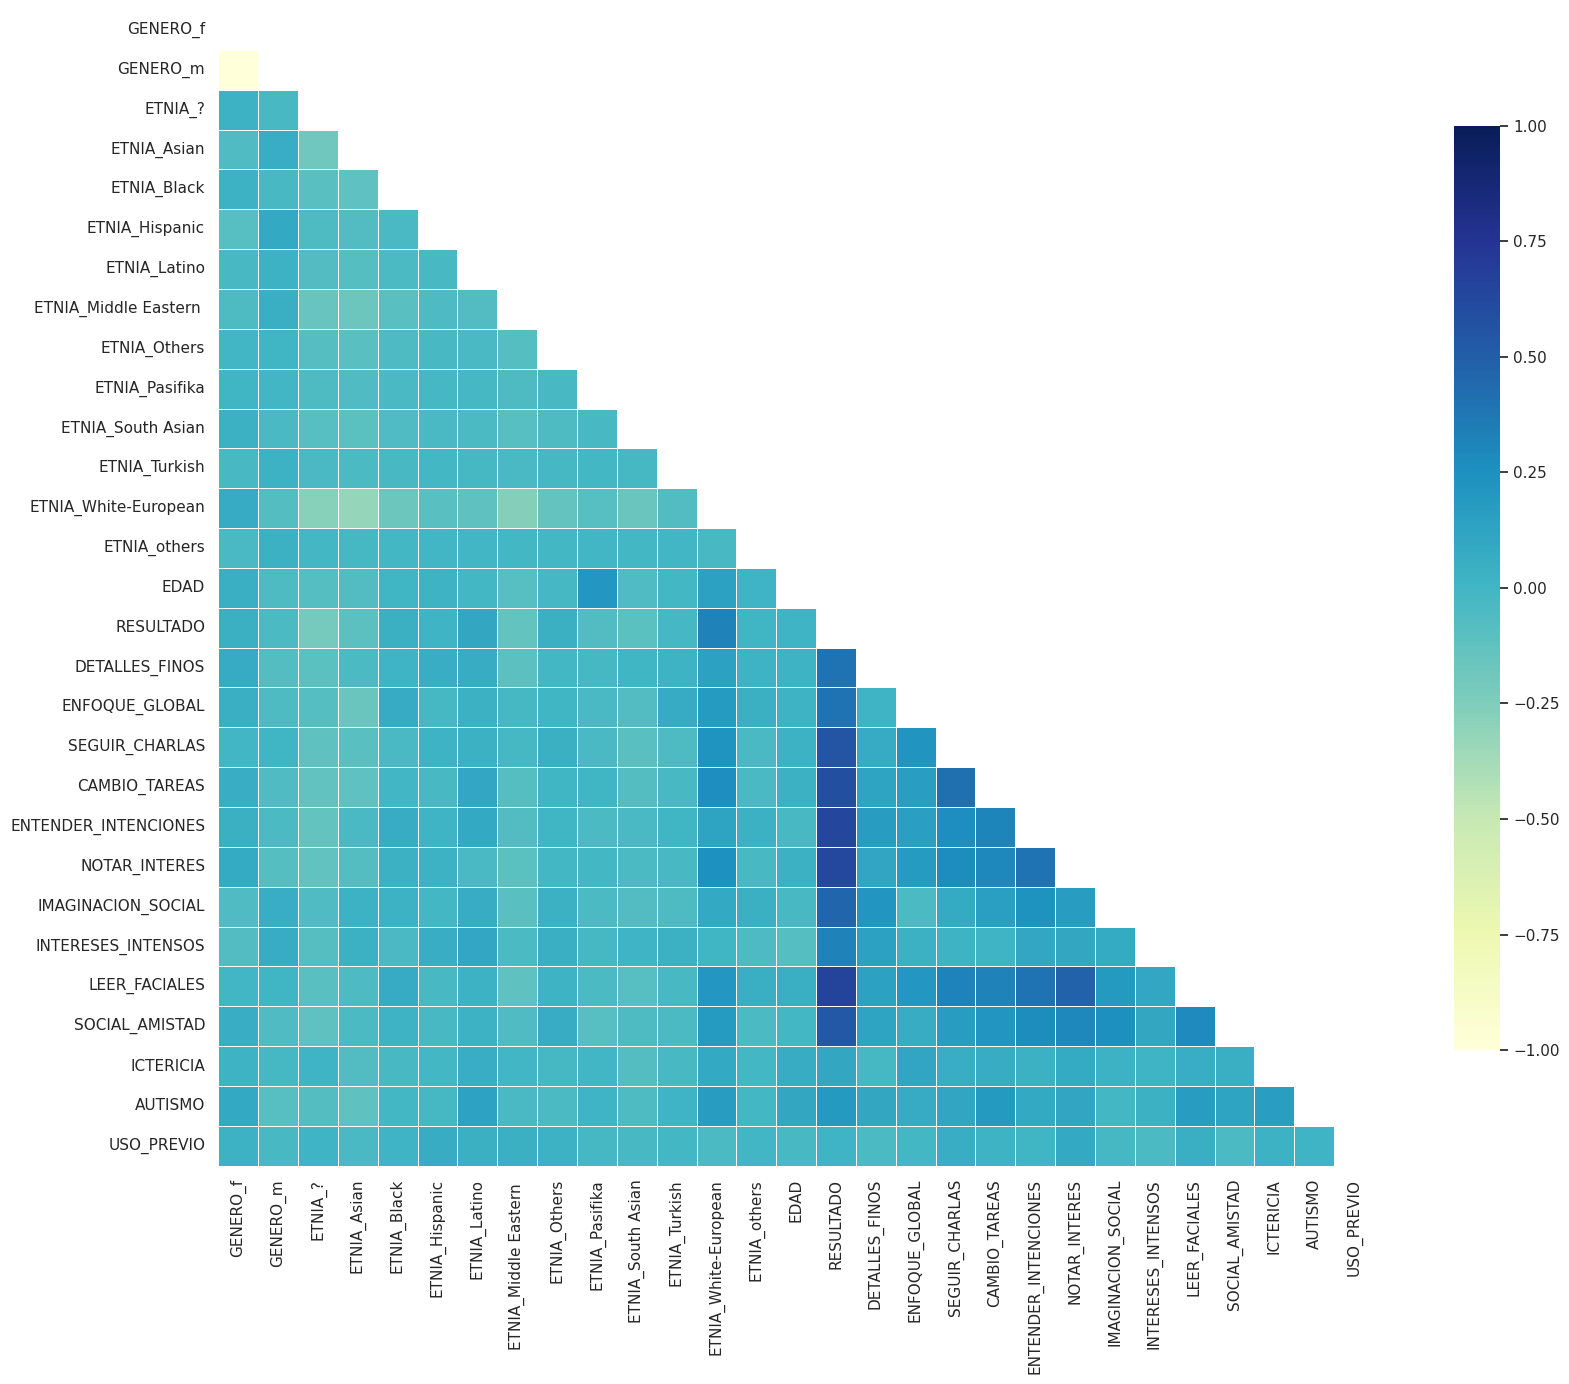

In [30]:

mask = np.zeros_like(cr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.set(style="white")

plt.figure(figsize=(18, 14))
ax = sns.heatmap(
    cr,
    mask=mask,
    cmap="YlGnBu",
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": 0.8},
    vmin=-1, vmax=1
)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# guardar la figura
# plt.savefig("attribute_correlations.png", dpi=300, bbox_inches="tight")

### <span id="sec62"></span> **6.2 Resultados**

- Las variables One-Hot (ETNIA y GENERO) muestran correlaciones casi nulas entre sí y con el resto, lo cual es coherente con su naturaleza categórica.  
- Las variables continuas EDAD y RESULTADO presentan correlaciones más visibles con varios ítems del test, indicando mayor aporte informativo.  
- Los ítems del cuestionario muestran correlaciones moderadas entre sí, evidenciando coherencia interna en las respuestas.  
- Variables como AUTISMO, ICTERICIA y USO_PREVIO presentan correlaciones muy bajas, siendo poco influyentes desde una perspectiva lineal.  
- En general, la matriz confirma un preprocesamiento correcto y señala que las variables del test y RESULTADO son las más relevantes para el modelado.


## <span id="sec7"></span> **7. Conclusiones**

La preparación del dataset permitió corregir problemas de codificación, valores faltantes y variables irrelevantes, dejando un conjunto de datos más limpio y coherente. Asimismo, la eliminación de atributos redundantes como EDAD_RANGO, RELACION y RESIDENCIA redujo ruido y mejoró la eficiencia de las transformaciones. Este proceso inicial fortaleció la calidad del tratamiento posterior.

Las transformaciones aplicadas garantizan un dataset completamente numérico y estandarizado, adecuado para modelos de clasificación. El uso de One-Hot Encoding para variables nominales y StandardScaler para todo el conjunto mantuvo la coherencia entre escalas y evitó sesgos. Además, la automatización mediante Pipeline asegura reproducibilidad y evita inconsistencias en futuros usos.

El cálculo de la matriz de correlación, visualizado mediante un mapa de calor triangular, permitió identificar asociaciones entre características después de la estandarización. En la figura del page 13, se observan correlaciones moderadas entre varias variables cognitivas, mientras que las variables demográficas muestran relaciones más débiles. Esta vista parcial evitó redundancia visual y facilitó la interpretación.

En términos generales, el pipeline generado deja un dataset consistente, escalado y adecuado para aplicar algoritmos de aprendizaje supervisado. También permite procesar nuevos datos con la misma lógica utilizada en el dataset original. En conjunto, el flujo implementado proporciona una base sólida y preparada para la siguiente etapa: el entrenamiento y evaluación del modelo predictivo.